# Support Vector Machine

<div style="float:right; font-style:italic;color:#AAAAAA">Author:Winglok</div><br>
<div style="float:right; font-style:italic;color:#AAAAAA">From:SCUT</div>

**Download the dataset "a9a&a9a.t":**

In [1]:
import requests
r1 = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")
r2 = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t")

**Load the dataset to X_train&y_train,X_val&y_val:**

In [2]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

X_train, y_train = load_svmlight_file(BytesIO(r1.content), n_features=123)
X_train = X_train.toarray()                                      
                                                            
X_val, y_val = load_svmlight_file(BytesIO(r2.content), n_features=123)         
X_val = X_val.toarray()                                                      

**Preprocess, change the shape of X_train&y_train,X_val&y_val:**

In [3]:
import numpy

n_train_samples, n_features = X_train.shape
X_train = numpy.column_stack((X_train, numpy.ones((n_train_samples, 1))))
y_train = y_train.reshape((-1, 1))   
                                                                               
n_val_samples, n_features = X_val.shape                                    
X_val = numpy.column_stack((X_val, numpy.ones((n_val_samples, 1))))            
y_val = y_val.reshape((-1, 1))               

**Define max iterations, learning rate  batch size and coefficient C:**

In [4]:
import random
max_epoch=1000
learning_rate = 0.0001
batch_size=1500
C = 0.5   

losses_train = []
losses_val = []

**Initialize w by different ways(using normal initialization where $\mu=0.1,\sigma=0.1$):**

In [5]:
# w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
# w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
w = numpy.random.normal(0.6, 0.6, size=(n_features + 1, 1))  # initialize with zero normal distributi

**Here are some formulas we needed:**

**Loss function(target):**

$$L=min\frac {||\omega||^2_2} 2+C \sum_{i=1}^m{max(0,1-y_i(X_i\omega))}$$

**Through simple derivation,we get:**

$$\frac{\partial L(\omega)} {\partial \omega}=\omega-C(X^Ty_i(or   0))$$

<span style="font-style:italic;color:#9a9898">If $1-y_i(X_i\omega)>0$ here is $y_i$,otherwise is 0</span>

**So, we know how to update $\omega$:**

$$\omega:=\omega-\alpha\frac{\partial L(\omega)} {\partial \omega}$$

**Training nad iterations:**

In [6]:
from sklearn.model_selection import train_test_split
for epoch in range(max_epoch):
    X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=1-batch_size/y_train.size)#split X_train and y_train to batch size                    
    h = 1 - y_t * numpy.dot(X_t, w)         
    y_d = numpy.where(h > 0, y_t, 0)#derivation for whether exits y_i
    w -= learning_rate * (w - C * numpy.dot(X_t.transpose(), y_d))

    loss_train = numpy.sum(w * w) + C * numpy.sum(numpy.maximum(1 - y_t * numpy.dot(X_t, w), 0))
    losses_train.append(loss_train/X_t.shape[0])#divided by m for get similar scale(loss)

    loss_val = numpy.sum(w * w) + C * numpy.sum(numpy.maximum(1 - y_val * numpy.dot(X_val, w), 0))
    losses_val.append(loss_val/X_val.shape[0])#divided by m for get similar scale(loss)

**Show the precision recall and f1-score rate:**

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_val, numpy.where(numpy.dot(X_val, w) > 0, 1, -1),
                            target_names=["positive", "negative"], digits=4))

             precision    recall  f1-score   support

   positive     0.8727    0.9253    0.8982     12435
   negative     0.7000    0.5637    0.6245      3846

avg / total     0.8319    0.8399    0.8336     16281



**Plot train loss and validation loss with diff iterations:**

Text(0.5,1,'The graph of training and validation loss value varing with the number of iterations')

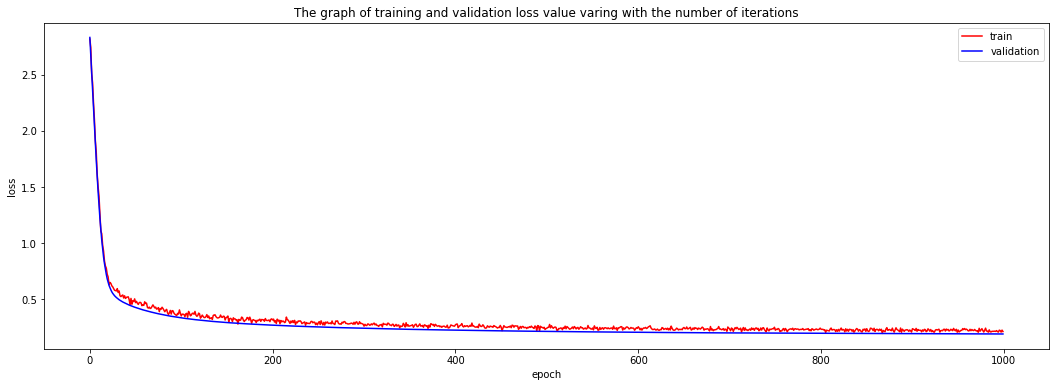

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of training and validation loss value varing with the number of iterations")

<span style="color:#9a9898">References:</span>

<span style="color:#9a9898">
1.SVM[EB/OL]. https://blog.csdn.net/liugan528/article/details/79448379.<br>
2.SVM理解与参数选择（kernel和C）[EB/OL]. https://blog.csdn.net/ybdesire/article/details/53915093.<br>
3.【机器学习】支持向量机SVM原理及推导[EB/OL]. https://blog.csdn.net/u014433413/article/details/78427574<br>
4.理解Hinge Loss (折页损失函数、铰链损失函数)[EB/OL]. https://blog.csdn.net/fendegao/article/details/79968994.<br>
5.Hinge loss[EB/OL]. https://blog.csdn.net/chaipp0607/article/details/76037351.<br>
6.损失函数：Hinge Loss（max margin）[EB/OL]. https://www.cnblogs.com/yymn/p/8336979.html.
 <\span>